In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
wego = pd.read_csv("Headway Data, 8-1-2023 to 9-30-2023.csv")

wego.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0


In [9]:
wego.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350329 entries, 0 to 350328
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   CALENDAR_ID                350329 non-null  int64  
 1   SERVICE_ABBR               350329 non-null  int64  
 2   ADHERENCE_ID               350329 non-null  int64  
 3   DATE                       350329 non-null  object 
 4   ROUTE_ABBR                 350329 non-null  int64  
 5   BLOCK_ABBR                 350329 non-null  int64  
 6   OPERATOR                   350329 non-null  int64  
 7   TRIP_ID                    350329 non-null  int64  
 8   OVERLOAD_ID                350329 non-null  int64  
 9   ROUTE_DIRECTION_NAME       350329 non-null  object 
 10  TIME_POINT_ABBR            350329 non-null  object 
 11  ROUTE_STOP_SEQUENCE        350318 non-null  float64
 12  TRIP_EDGE                  350329 non-null  int64  
 13  LATITUDE                   35

1. What is the overall on-time performance, and what do the overall distribution of adherence look like?

In [12]:
# to sum up the adjusted counts
total_early = wego['ADJUSTED_EARLY_COUNT'].sum()
total_late = wego['ADJUSTED_LATE_COUNT'].sum()
total_ontime = wego['ADJUSTED_ONTIME_COUNT'].sum()

# total adjusted obsercations
total_adjusted = total_early + total_late + total_ontime

# on-time performance percentage
ontime_percentage = (total_ontime / total_adjusted) * 100

print(f"Overall On-Time Performance: {ontime_percentage:.2f}%")

Overall On-Time Performance: 79.69%


In [17]:
# Summary statistics for adherence   **need to add visualization**
wego['ADHERENCE'].describe()

count    338861.000000
mean         -3.188796
std           6.898842
min        -948.533333
25%          -4.566666
50%          -2.000000
75%          -0.333333
max          88.383333
Name: ADHERENCE, dtype: float64

2. How does direction of travel, route, or location affect the on-time performance?

In [18]:
# group by direction of travel, route, or location (time points) and calculate adjusted ontime percentages for each

# by route: 
route_group = wego.groupby('ROUTE_ABBR').agg({
    'ADJUSTED_ONTIME_COUNT': 'sum',
    'ADJUSTED_LATE_COUNT': 'sum',
    'ADJUSTED_EARLY_COUNT': 'sum'
})

route_group['OnTime_Percentage'] = (
    route_group['ADJUSTED_ONTIME_COUNT'] /
    (route_group['ADJUSTED_ONTIME_COUNT'] + route_group['ADJUSTED_LATE_COUNT'] + route_group['ADJUSTED_EARLY_COUNT'])
) * 100

# Show top and bottom routes by on-time performance
route_group.sort_values('OnTime_Percentage', ascending=False).head(10)

,ADJUSTED_ONTIME_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_EARLY_COUNT,OnTime_Percentage
ROUTE_ABBR,,,,
22,22492,2065,631,89.296490
23,35137,3230,1286,88.611202
50,36309,5113,1207,85.174412
56,48361,8837,1752,82.037320
7,13417,3417,433,77.703133
52,37736,10038,1553,76.501713
3,34516,9590,1382,75.879353
55,42080,16748,1531,69.716198


In [21]:
# by travel (route_direction_name

# Group by direction and calculate adjusted on-time performance
direction_group = wego.groupby('ROUTE_DIRECTION_NAME').agg({
    'ADJUSTED_ONTIME_COUNT': 'sum',
    'ADJUSTED_LATE_COUNT': 'sum',
    'ADJUSTED_EARLY_COUNT': 'sum'
})

# Calculate percentage
direction_group['OnTime_Percentage'] = (
    direction_group['ADJUSTED_ONTIME_COUNT'] /
    (direction_group['ADJUSTED_ONTIME_COUNT'] + direction_group['ADJUSTED_LATE_COUNT'] + direction_group['ADJUSTED_EARLY_COUNT'])
) * 100

direction_group.sort_values('OnTime_Percentage', ascending=False)

,ADJUSTED_ONTIME_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_EARLY_COUNT,OnTime_Percentage
ROUTE_DIRECTION_NAME,,,,
TO DOWNTOWN,135634,19437,4484,85.007678
FROM DOWNTOWN,134414,39601,5291,74.963470


In [22]:
# by location (time_point_abbr) 
location_group = wego.groupby('TIME_POINT_ABBR').agg({
    'ADJUSTED_ONTIME_COUNT': 'sum',
    'ADJUSTED_LATE_COUNT': 'sum',
    'ADJUSTED_EARLY_COUNT': 'sum'
})

location_group['OnTime_Percentage'] = (
    location_group['ADJUSTED_ONTIME_COUNT'] /
    (location_group['ADJUSTED_ONTIME_COUNT'] + location_group['ADJUSTED_LATE_COUNT'] + location_group['ADJUSTED_EARLY_COUNT'])
) * 100

# Show locations with best and worst on-time performance
location_group.sort_values('OnTime_Percentage', ascending=True).head(10)

,ADJUSTED_ONTIME_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_EARLY_COUNT,OnTime_Percentage
TIME_POINT_ABBR,,,,
MCC5_7,2,31,3,5.555556
MCC4_13,19,3,48,27.142857
MCC5_11,21,49,0,30.000000
MCC5_12,16,23,0,41.025641
HEAD,37,3,32,51.388889
MCC4_22,53,34,15,51.960784
DCSCC,1021,699,125,55.338753
MCC4_20,55,43,1,55.555556
MXDONEL,6320,3338,277,63.613488


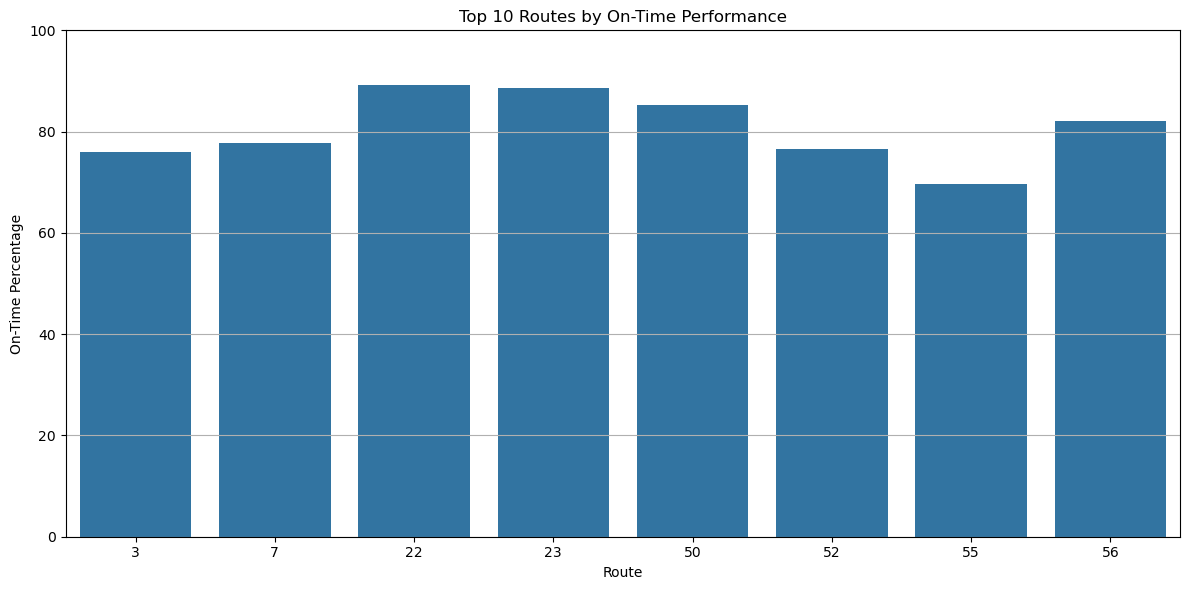

In [24]:
# visualize all 3 

# Example: top 10 routes by on-time %
top_routes = route_group.sort_values('OnTime_Percentage', ascending=False).head(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=top_routes, x='ROUTE_ABBR', y='OnTime_Percentage')
plt.title('Top 10 Routes by On-Time Performance')
plt.ylabel('On-Time Percentage')
plt.xlabel('Route')
plt.ylim(0, 100)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

3. How does time of day or day of week affect on-time performance?

In [29]:
# 1. Parse datetime from scheduled time
wego['SCHEDULED_DATETIME'] = pd.to_datetime(
    wego['SCHEDULED_TIME'], format='%Y-%m-%d %H:%M:%S', errors='coerce'
)

# 2. Extract hour and weekday BEFORE filtering
wego['HOUR'] = wego['SCHEDULED_DATETIME'].dt.hour
wego['WEEKDAY'] = wego['SCHEDULED_DATETIME'].dt.day_name()

# 3. Calculate total count and filter out rows with zero total
wego['TOTAL_COUNT'] = (
    wego['ADJUSTED_EARLY_COUNT'] +
    wego['ADJUSTED_LATE_COUNT'] +
    wego['ADJUSTED_ONTIME_COUNT']
)

wego_filtered = wego[wego['TOTAL_COUNT'] > 0].copy()

# 4. Calculate on-time percentage
wego_filtered['ON_TIME_PCT'] = (
    wego_filtered['ADJUSTED_ONTIME_COUNT'] / wego_filtered['TOTAL_COUNT'] * 100
)

# 5. Group by hour and weekday
hourly_perf = wego_filtered.groupby('HOUR')['ON_TIME_PCT'].mean()

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_perf = wego_filtered.groupby('WEEKDAY')['ON_TIME_PCT'].mean().reindex(weekday_order)


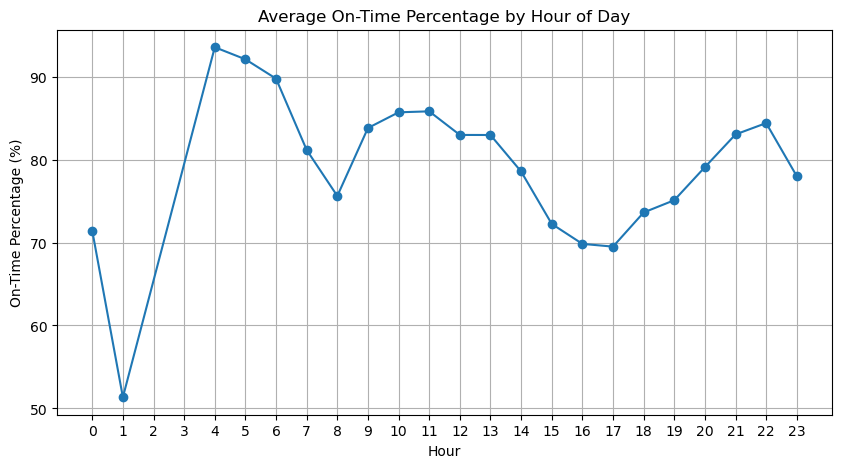

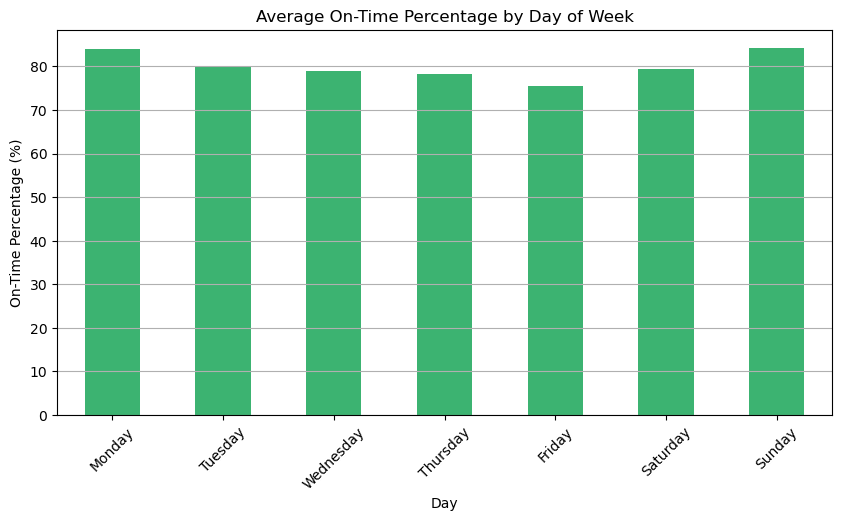

In [30]:
# Hourly plot
plt.figure(figsize=(10, 5))
hourly_perf.plot(marker='o')
plt.title('Average On-Time Percentage by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('On-Time Percentage (%)')
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()

# Weekly plot
plt.figure(figsize=(10, 5))
weekday_perf.plot(kind='bar', color='mediumseagreen')
plt.title('Average On-Time Percentage by Day of Week')
plt.xlabel('Day')
plt.ylabel('On-Time Percentage (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

4. How much of a factor does the driver have on on-time performance? The driver is indicated by the OPERATOR variable.

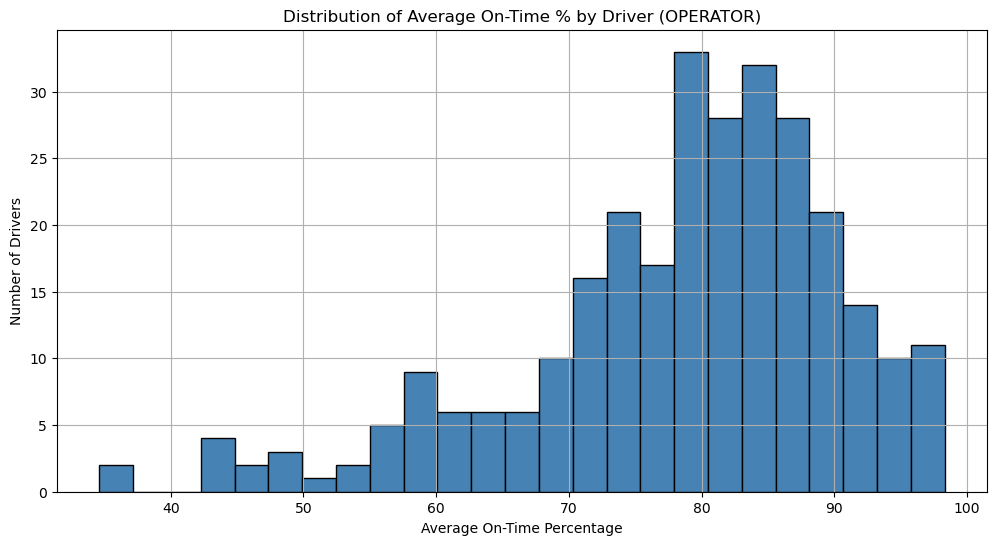

In [31]:
# group by OPERATOR and compute driver's total timpeoint count and on-time %

# 1. Calculate per-row total and on-time %
wego['TOTAL_COUNT'] = (
    wego['ADJUSTED_EARLY_COUNT'] +
    wego['ADJUSTED_LATE_COUNT'] +
    wego['ADJUSTED_ONTIME_COUNT']
)

wego['ON_TIME_PCT'] = (
    wego['ADJUSTED_ONTIME_COUNT'] / wego['TOTAL_COUNT'] * 100
)

# 2. Filter valid rows
wego_driver = wego[wego['TOTAL_COUNT'] > 0].copy()

# 3. Group by operator
operator_perf = wego_driver.groupby('OPERATOR').agg(
    total_points=('TOTAL_COUNT', 'sum'),
    avg_on_time_pct=('ON_TIME_PCT', 'mean'),
    trip_count=('ON_TIME_PCT', 'count')
)

# 4. Filter out operators with few trips (e.g., < 100)
operator_perf_filtered = operator_perf[operator_perf['trip_count'] >= 100]

# 5. Sort by on-time percentage
operator_perf_sorted = operator_perf_filtered.sort_values('avg_on_time_pct', ascending=False)

# 6. Visualize
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.hist(operator_perf_filtered['avg_on_time_pct'], bins=25, color='steelblue', edgecolor='black')
plt.title('Distribution of Average On-Time % by Driver (OPERATOR)')
plt.xlabel('Average On-Time Percentage')
plt.ylabel('Number of Drivers')
plt.grid(True)
plt.show()



5. Is there any relationship between lateness (ADHERENCE) and headway deviation? The headway deviation variable is contained in the HDWY_DEV column. See the notes under number 9 for a description of headway and headway deviation.

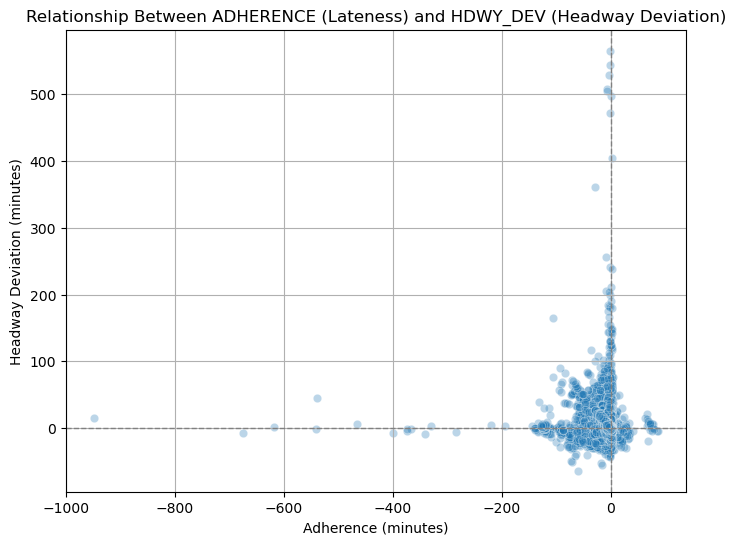

Correlation between ADHERENCE and HDWY_DEV: -0.21


In [32]:
# 1. Filter valid rows
wego_corr = wego[['ADHERENCE', 'HDWY_DEV']].dropna()

# 2. Scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=wego_corr, x='ADHERENCE', y='HDWY_DEV', alpha=0.3)
plt.title('Relationship Between ADHERENCE (Lateness) and HDWY_DEV (Headway Deviation)')
plt.xlabel('Adherence (minutes)')
plt.ylabel('Headway Deviation (minutes)')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.grid(True)
plt.show()

# 3. Correlation
correlation = wego_corr['ADHERENCE'].corr(wego_corr['HDWY_DEV'])
print(f"Correlation between ADHERENCE and HDWY_DEV: {correlation:.2f}")

6. How much impact does being late or too spaced out at the first stop have downstream?

In [33]:
# identify first stop of each tripe i.e. TRIP_EDGE == 1, then calculate adhere and HDWY_DEV
# Ensure CALENDAR_ID and TRIP_ID are treated properly
wego['TRIP_KEY'] = wego['CALENDAR_ID'].astype(str) + '_' + wego['TRIP_ID'].astype(str)

# Get first stop's adherence and headway dev for each trip
first_stop = wego[wego['TRIP_EDGE'] == 1][['TRIP_KEY', 'ADHERENCE', 'HDWY_DEV']]
first_stop = first_stop.rename(columns={
    'ADHERENCE': 'START_ADHERENCE',
    'HDWY_DEV': 'START_HDWY_DEV'
})


In [34]:
# merge first stop data back onto the whole trip
wego_merged = wego.merge(first_stop, on='TRIP_KEY', how='left')

# Only keep downstream stops (TRIP_EDGE == 0 or 2)
downstream = wego_merged[wego_merged['TRIP_EDGE'].isin([0, 2])].copy()

# Bin first stop adherence
def label_start_late(val):
    if pd.isna(val):
        return 'Unknown'
    elif val < -6:
        return 'Late Start'
    elif val > 1:
        return 'Early Start'
    else:
        return 'On-time Start'

downstream['StartCategory'] = downstream['START_ADHERENCE'].apply(label_start_late)


In [35]:
# group and summarize downstream effects
summary = downstream.groupby('StartCategory')[['ADHERENCE', 'HDWY_DEV']].mean()
print(summary)



               ADHERENCE  HDWY_DEV
StartCategory                     
Early Start    -5.001585  2.090128
Late Start    -11.429973  4.056664
On-time Start  -2.338468  0.090082
Unknown        -4.670315  1.071661


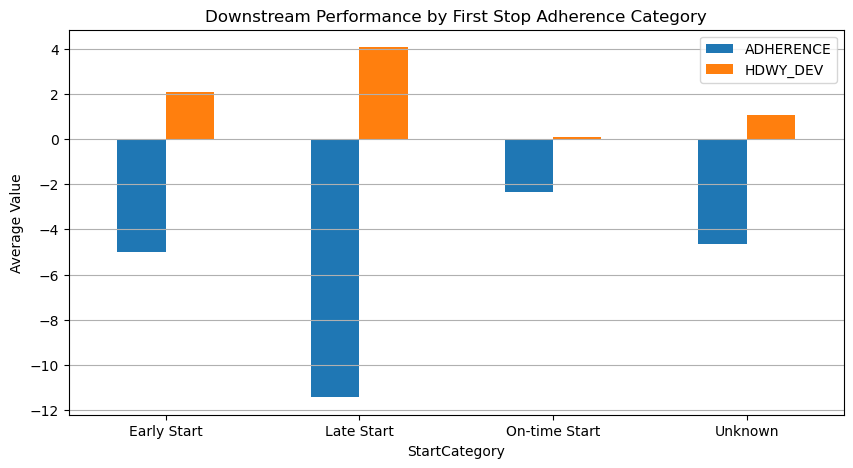

In [36]:
summary.plot(kind='bar', figsize=(10, 5), title='Downstream Performance by First Stop Adherence Category')
plt.ylabel('Average Value')
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.show()

buses that start on time tend to be only about 2.3 min late downstream and have almonst no headway deviation i.e. service is evenly spaced. late start buses (more than 6 minutes late) are very late downstream at an average of 11.4 minutes late. they have large headway gaps of about 4.06 min, likely causing bunching and delays. early state buses (more than 1 minute early), still end up 5 minutes late downstream on average. have 2.1 min headway deviation -- suggestingg starting early doesn't really help. 

 Key Takeaways:

    Starting on time matters. It leads to the best downstream adherence and the most stable headway.

    Starting late is the worst, strongly associated with cascading delay and uneven spacing.

    Starting early isn't a good fix — buses still fall behind and disrupt spacing.

7. What is the impact of the layover at the start of the trip (the difference between the first stop arrival and departure time)? Does more dwell time at the beginning of a trip lead to more stable headways (lower values for % headway deviation)? Do trips with longer scheduled layover time have more stable headway values?

In [38]:

# Step 1: Filter for first stops only (TRIP_EDGE == 1)
first_stops = wego[wego['TRIP_EDGE'] == 1].copy()

# Step 2: Compute actual layover (arrival - departure in minutes)
first_stops['ARRIVAL_TIME'] = pd.to_datetime(first_stops['ACTUAL_ARRIVAL_TIME'], errors='coerce')
first_stops['DEPARTURE_TIME'] = pd.to_datetime(first_stops['ACTUAL_DEPARTURE_TIME'], errors='coerce')
first_stops['ACTUAL_LAYOVER'] = (first_stops['DEPARTURE_TIME'] - first_stops['ARRIVAL_TIME']).dt.total_seconds() / 60

# Step 3: Select relevant columns and drop missing values
layover_analysis = first_stops[['TRIP_ID', 'CALENDAR_ID', 'ACTUAL_LAYOVER', 'SCHEDULED_LAYOVER_MINUTES', 'HDWY_DEV']].dropna()

# Step 4: Calculate correlation between layover times and headway deviation
correlation_actual = layover_analysis['ACTUAL_LAYOVER'].corr(layover_analysis['HDWY_DEV'])
correlation_scheduled = layover_analysis['SCHEDULED_LAYOVER_MINUTES'].corr(layover_analysis['HDWY_DEV'])

correlation_actual, correlation_scheduled


(0.05584703753098817, 0.005288220039404527)

Both correlations are very close to 0, meaning there's little to no linear relationship between layover time at the first stop and headway deviation.
Longer layovers do not significantly improve or worsen headway stability.
The timing between buses (headway) appears to be influenced more by other factors — like traffic, operator behavior, delays en route, or schedule adherence earlier in the block. More dwell time or longer scheduled layover at the beginning of a trip does not meaningfully reduce headway irregularities downstream.

In [43]:
# Group by layover bin and calculate mean headway deviation
binned_hdwy_table = layover_analysis.groupby('ACTUAL_LAYOVER_BIN')['HDWY_DEV'].mean().reset_index()

# Rename columns for clarity
binned_hdwy_table.columns = ['Layover Bin', 'Average Headway Deviation (min)']

# Round values for cleaner display
binned_hdwy_table['Average Headway Deviation (min)'] = binned_hdwy_table['Average Headway Deviation (min)'].round(2)

# Display the table
print(binned_hdwy_table)


  Layover Bin  Average Headway Deviation (min)
0      <5 min                             0.05
1    5-10 min                             0.14
2   10-15 min                             0.06
3   15-30 min                             0.85
4     30+ min                             1.39


C:\Users\lenahuyn\AppData\Local\Temp\ipykernel_2724\1477377479.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_hdwy_table = layover_analysis.groupby('ACTUAL_LAYOVER_BIN')['HDWY_DEV'].mean().reset_index()


C:\Users\lenahuyn\AppData\Local\Temp\ipykernel_2724\1152279296.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_hdwy = layover_analysis.groupby('ACTUAL_LAYOVER_BIN')['HDWY_DEV'].mean()


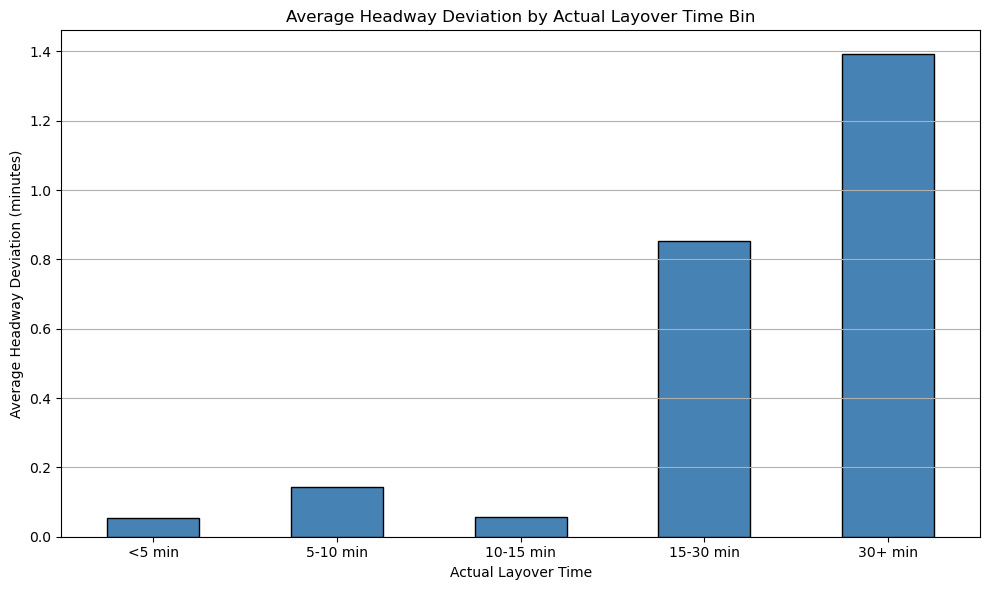

In [40]:
# Bin actual layover times into categories
bins = [0, 5, 10, 15, 30, 60]
labels = ['<5 min', '5-10 min', '10-15 min', '15-30 min', '30+ min']

layover_analysis['ACTUAL_LAYOVER_BIN'] = pd.cut(
    layover_analysis['ACTUAL_LAYOVER'],
    bins=bins,
    labels=labels,
    right=False
)
# Group and compute average headway deviation per layover bin
binned_hdwy = layover_analysis.groupby('ACTUAL_LAYOVER_BIN')['HDWY_DEV'].mean()

# Plot the bar chart
plt.figure(figsize=(10, 6))
binned_hdwy.plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Average Headway Deviation by Actual Layover Time Bin')
plt.xlabel('Actual Layover Time')
plt.ylabel('Average Headway Deviation (minutes)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Short layovers (under 15 minutes) are associated with very low headway deviation (better spacing).
Longer layovers (>15 minutes) are associated with much higher headway deviation — buses are likely going out of rhythm with the schedule.
This still supports the idea that moderate layovers (but not excessive ones) are better for spacing.

8. What is the relationship between distance or time traveled since the start of a given trip and the adherence value? Does on-time performance become less stable the further along the route the bus has traveled?

In [48]:
#group data by route_stop_sequence to find distance into the trip. calculate mean/ std dev of adherence at each stop sequence.

# Step 1: Filter rows with non-null values for ROUTE_STOP_SEQUENCE and ADHERENCE
wego_filtered = wego[['ROUTE_STOP_SEQUENCE', 'ADHERENCE']].dropna()

# Step 2: Group by route stop sequence and calculate mean and standard deviation of adherence
wego_stats = wego_filtered.groupby('ROUTE_STOP_SEQUENCE')['ADHERENCE'].agg(['mean', 'std']).reset_index()

wego_stats

,ROUTE_STOP_SEQUENCE,mean,std
0,1.0,0.337605,9.775056
1,2.0,-2.294420,10.263896
2,3.0,-3.044242,5.535333
3,4.0,-3.625569,7.748143
4,5.0,-3.156239,7.911792
5,6.0,-2.887301,6.251862
6,7.0,-3.039380,5.223260
7,8.0,-3.591807,5.657576
8,9.0,-4.033266,6.247443
9,10.0,-4.229940,6.548240


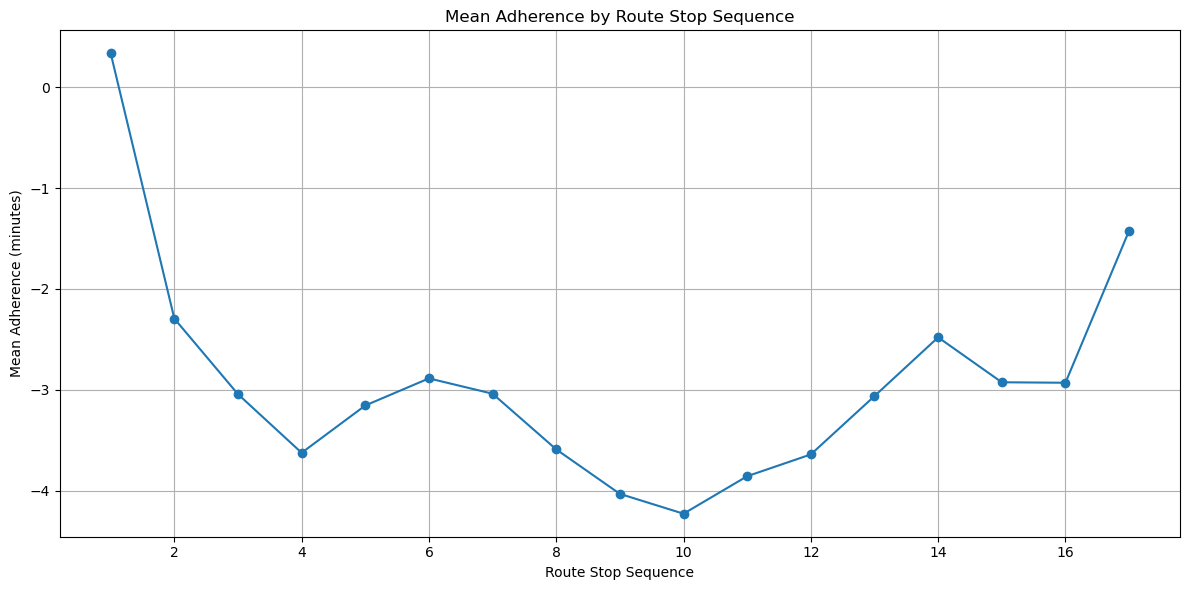

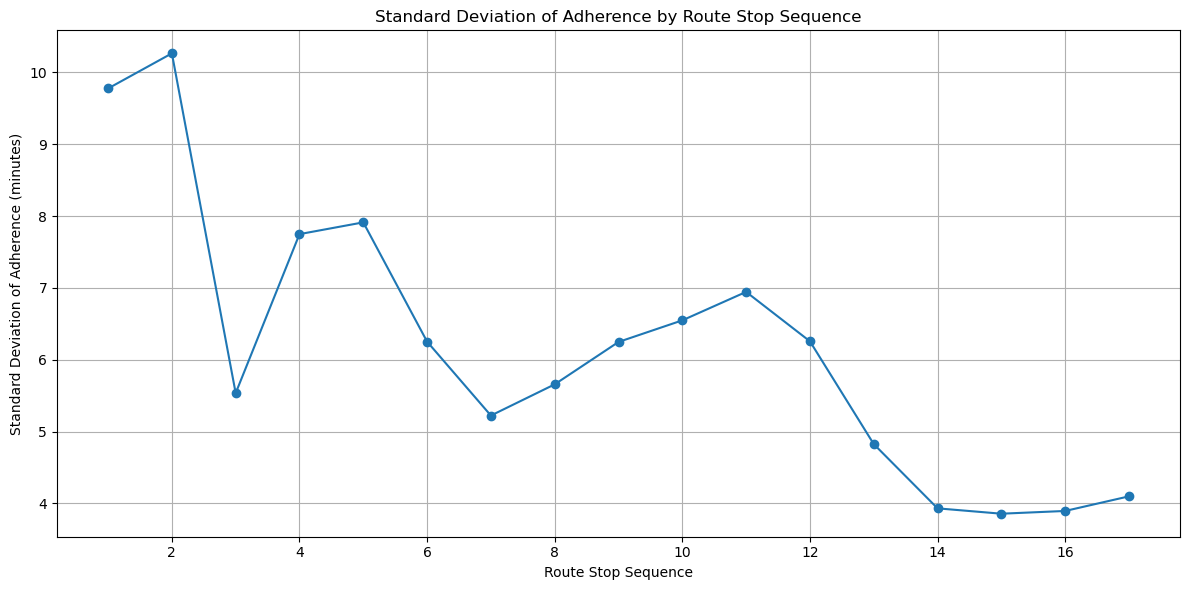

In [50]:
# Plot mean adherence
plt.figure(figsize=(12, 6))
plt.plot(wego_stats['ROUTE_STOP_SEQUENCE'], wego_stats['mean'], marker='o')
plt.title('Mean Adherence by Route Stop Sequence')
plt.xlabel('Route Stop Sequence')
plt.ylabel('Mean Adherence (minutes)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot standard deviation of adherence
plt.figure(figsize=(12, 6))
plt.plot(wego_stats['ROUTE_STOP_SEQUENCE'], wego_stats['std'], marker='o')
plt.title('Standard Deviation of Adherence by Route Stop Sequence')
plt.xlabel('Route Stop Sequence')
plt.ylabel('Standard Deviation of Adherence (minutes)')
plt.grid(True)
plt.tight_layout()
plt.show()

The mean adherence starts near zero and fluctuates slightly as the trip progresses.
There isn’t a consistent upward or downward trend, but some stops show average early or late departures.
The standard deviation increases as the route progresses.
This suggests greater variability in adherence further along the route — in other words, on-time performance becomes less stable the farther the bus travels.